In [2]:
#1. Import dataset
import pandas as pd
train_set_clean_transform= pd.read_csv("train_set_clean_transform.csv")
test_set_clean_transform= pd.read_csv("test_set_clean_transform.csv")

In [3]:
# 4. Check data types of variables
print("\nData types of each column(Train):")
print(train_set_clean_transform.dtypes)
print("\nData types of each column(Test):")
print(test_set_clean_transform.dtypes)


Data types of each column(Train):
seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
Albuminuria            int64
MetabolicSyndrome      int64
QT_WaistCirc         float64
QT_BMI               float64
QT_UrAlbCr           float64
QT_UricAcid          float64
QT_BloodGlucose      float64
QT_HDL               float64
QT_Triglycerides     float64
dtype: object

Data types of each column(Test):
seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
Albuminuria            int64
MetabolicSyndrome      int64
QT_WaistCirc         float64
QT_BMI               float64
QT_UrAlbCr           float64
QT_UricAcid          float64
QT_BloodGlucose      float64
QT_HDL               float64
QT_Triglycerides     float64
dtype: object


In [4]:
#6. Identify object type columns
object_cols = train_set_clean_transform.select_dtypes(include=['object']).columns
# Convert object type columns to category
train_set_clean_transform[object_cols] = train_set_clean_transform[object_cols].astype('category')
# Verify the conversion
#print("Data types after conversion:")
#print(train_set_clean_transform.dtypes)
# Optional: Show memory usage before and after conversion
#print("\nMemory usage before conversion:", train_set_clean_transform.memory_usage(deep=True).sum()/1024, "KB")
#7. Convert data types
train_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']] = train_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(train_set_clean_transform.dtypes)


#6. Identify object type columns
object_cols = test_set_clean_transform.select_dtypes(include=['object']).columns
# Convert object type columns to category
test_set_clean_transform[object_cols] = test_set_clean_transform[object_cols].astype('category')
# Verify the conversion
#print("Data types after conversion:")
#print(test_set_clean_transform.dtypes)
# Optional: Show memory usage before and after conversion
#print("\nMemory usage before conversion:", test_set_clean_transform.memory_usage(deep=True).sum()/1024, "KB")
#7. Convert data types
test_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']] = test_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(test_set_clean_transform.dtypes)


Data types after conversion:
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object
Data types after conversion:
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object


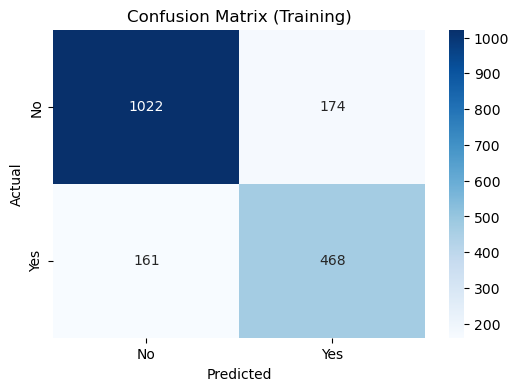


Classification Report (Training):
                      precision    recall  f1-score   support

No MetabolicSyndrome       0.86      0.85      0.86      1196
   MetabolicSyndrome       0.73      0.74      0.74       629

            accuracy                           0.82      1825
           macro avg       0.80      0.80      0.80      1825
        weighted avg       0.82      0.82      0.82      1825



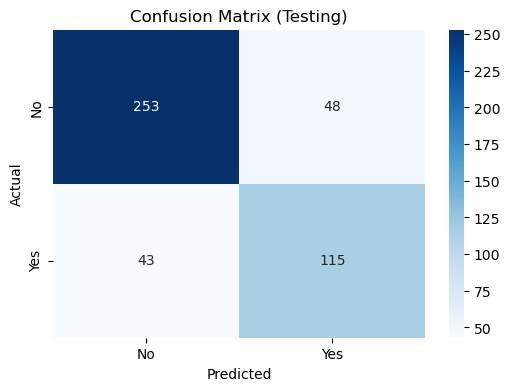


Classification Report (Testing):
                      precision    recall  f1-score   support

No MetabolicSyndrome       0.85      0.84      0.85       301
   MetabolicSyndrome       0.71      0.73      0.72       158

            accuracy                           0.80       459
           macro avg       0.78      0.78      0.78       459
        weighted avg       0.80      0.80      0.80       459


Training Metrics:
                         Value
Accuracy              0.816438
Sensitivity (Recall)  0.744038
Specificity           0.854515
F1 Score              0.736428
AUC-ROC               0.888530

Testing Metrics:
                         Value
Accuracy              0.801743
Sensitivity (Recall)  0.727848
Specificity           0.840532
F1 Score              0.716511
AUC-ROC               0.884962

=== Calibrated Model ===


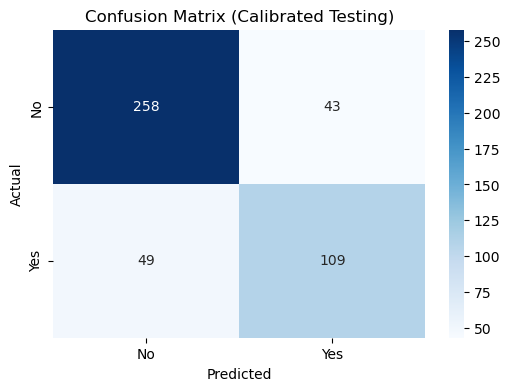


Classification Report (Calibrated Testing):
                      precision    recall  f1-score   support

No MetabolicSyndrome       0.84      0.86      0.85       301
   MetabolicSyndrome       0.72      0.69      0.70       158

            accuracy                           0.80       459
           macro avg       0.78      0.77      0.78       459
        weighted avg       0.80      0.80      0.80       459



In [8]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, classification_report)
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================
# 1. DATA PREPARATION
# =============================================

# Separate features and target
X_train = train_set_clean_transform.drop(['MetabolicSyndrome','seqn','QT_UrAlbCr'], axis=1)
y_train = train_set_clean_transform['MetabolicSyndrome'].cat.codes
X_test = test_set_clean_transform.drop(['MetabolicSyndrome','seqn','QT_UrAlbCr'], axis=1)
y_test = test_set_clean_transform['MetabolicSyndrome'].cat.codes

# =============================================
# 2. PREPROCESSING
# =============================================

# Answer to Q1: 
# - Standardization: Not required but recommended for GaussianNB (using MinMaxScaler)
# - One-hot encoding: Required for categorical variables (Naive Bayes needs numeric input)

# Identify column types
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create transformers
numeric_transformer = MinMaxScaler()  # GaussianNB prefers features in similar ranges

categorical_transformer = OneHotEncoder(
    handle_unknown='ignore', 
    sparse_output=False,
    drop='first'  # Avoid dummy variable trap
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# =============================================
# 3. NAIVE BAYES MODEL
# =============================================

# Initialize and train Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_processed, y_train)

# =============================================
# 4. EVALUATION
# =============================================

def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    metrics = {
        'Accuracy': accuracy_score(y, y_pred),
        'Sensitivity (Recall)': recall_score(y, y_pred),
        'Specificity': recall_score(y, y_pred, pos_label=0),
        'F1 Score': f1_score(y, y_pred),
        'AUC-ROC': roc_auc_score(y, y_proba)
    }
    
    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'], 
                yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print(f"\nClassification Report ({dataset_name}):")
    print(classification_report(y, y_pred, target_names=['No MetabolicSyndrome', 'MetabolicSyndrome']))
    
    return metrics

# Evaluate
train_metrics = evaluate_model(nb_model, X_train_processed, y_train, 'Training')
test_metrics = evaluate_model(nb_model, X_test_processed, y_test, 'Testing')

# Display results
print("\nTraining Metrics:")
print(pd.DataFrame.from_dict(train_metrics, orient='index', columns=['Value']))

print("\nTesting Metrics:")
print(pd.DataFrame.from_dict(test_metrics, orient='index', columns=['Value']))

# =============================================
# 5. PROBABILITY CALIBRATION (OPTIONAL)
# =============================================

from sklearn.calibration import CalibratedClassifierCV

# Calibrate probabilities (helps with reliability of predicted probabilities)
calibrated_nb = CalibratedClassifierCV(nb_model, cv=5, method='isotonic')
calibrated_nb.fit(X_train_processed, y_train)

# Evaluate calibrated model
print("\n=== Calibrated Model ===")
test_metrics_calibrated = evaluate_model(calibrated_nb, X_test_processed, y_test, 'Calibrated Testing')

# =============================================
# ANSWERS TO YOUR QUESTIONS
# =============================================

#"""
#Q1: Does Naive Bayes require standardization and one-hot encoding?
#- Standardization: Not strictly required but recommended (used MinMaxScaler here)
#- One-hot encoding: REQUIRED for categorical variables (GaussianNB needs numeric input)

#Key Points:
#1. Gaussian Naive Bayes assumes normally distributed features
#2. One-hot encoding converts categorical variables to numeric format
#3. MinMax scaling helps features contribute equally
#4. Probability calibration improves reliability of predictions
#"""